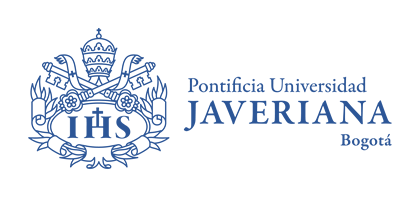

# Aprendizaje de máquina - Laboratorio: Regresión lineal
En este notebook vamos a explorar la implementación de un modelo de regresión lineal usando Python bpasico y la librería [NumPy](numpy.org).

## Setup

Importaremos las librerías necesarias para el ejercicio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

## Regresión lineal

La regresión lineal es el modelo más simple de aprendizaje de máquina supervisado. El modelo asume que la relación entre las variables independientes y dependientes es aproximadamente lineal.

La tarea de una hipótesis de regresión lineal es estimar la variable objetivo $\hat{y}$ encontrando un vector de pesos $\mathbf{\theta}$  un término de sesgo  $\theta_0$ al minimizar una función de pérdida sobre un conjunto de entrenamiento de datos ($x_{i},y_{i})$.

$ \underset{\mathbf{w}_{*},b_{*}}\min \mathscr{L}( y,\mathbf{x}^\top\mathbf{w}+ b )$






## Caso de estudio - Costos médicos

Es este caso de estudio usaremos los datos de costos de una compañia de seguros médicos. El dataset cuenta con información acerca de los asegurados (edad, sexo, bmi, hijos, fuma, región) y los costos que tuvo para la compañia esa persona.

Algunos costos en los que incurre la compañia de seguros pueden estar asociados a eventos fortuitos, pero se espera que ciertas poblaciones (personas de más edad o fumadores por ejemplo) impliquen mayores costos para las compañias.

Teniendo en cuenta los datos históricos de la compañia de seguros médicos, La compañia quiere estimar el costo de pacientes nuevos para poder ajustar mejor su esquema de costos y financiación.


### Créditos

El dataset de costos médicos es un dataset sintético creado para el libro Machine Learning with R (2nd. ed.) Brett Lantz. Packt Publishing.




## Exploración de datos

En esta sección entenderemos mejor los datos que tenemos mediante un análisis descriptivo de los datos. Para eso utilizaremos la librería [pandas ](https://pandas.pydata.org/) para cargar la información, y  [matplotlib](https:/matplotlib.org/) para visualizar la relación entre algunas variables.

### Pandas library

Antes de comenzar la exploración, se realizará una pequeña guia de uso de Pandas

Pandas is una libreria para la extracción y manipulación de información tabular en Python. Se mostrará el uso de Pandas mediante algunas funciones importantes para la manipulación de datos

In [2]:
# Creación de objeto pandas dataframe
patients_df=pd.read_csv('https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv?raw=true')

In [3]:
# La función type nos ayuda a saber qué tipo de objeto tenemos en una variable
type(patients_df)

pandas.core.frame.DataFrame

In [4]:
# Podemos también desplegar ayuda sobre el objeto
#help(patients_df)
patients_df?

In [7]:
patients_df.shape

(1338, 7)

In [5]:
#Imprimimos por pantalla la información
patients_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Muestreo inicial de datos
patients_df.sample(10)

,age,sex,bmi,children,smoker,region,charges
711,50,female,23.540,2,no,southeast,10107.22060
1118,33,male,35.750,1,yes,southeast,38282.74950
841,59,male,24.700,0,no,northeast,12323.93600
653,45,female,36.300,2,no,southeast,8527.53200
1190,31,female,32.775,2,no,northwest,5327.40025
565,19,female,30.495,0,no,northwest,2128.43105
33,63,male,28.310,0,no,northwest,13770.09790
1095,18,female,31.350,4,no,northeast,4561.18850
446,60,male,29.640,0,no,northeast,12730.99960
820,45,male,33.700,1,no,southwest,7445.91800


In [8]:
# Primeras  5 filas
patients_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
patients_df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [10]:
# Shape (dimensiones) del DataFrame (1338 rows and 7 columns)
patients_df.shape

(1338, 7)

### Pandas indexing

Un dataframe de pandas tiene 2 índices: column index y rows index

In [11]:
# Indice de columnas
patients_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
# Indice de filas: 0 a 1338
patients_df.index

RangeIndex(start=0, stop=1338, step=1)

Los índices silrven para selecionar o filtrar elementos del Dataframe.

In [ ]:
# Indexar una única columna, es un objeto Series
patients_df['age']

In [13]:
type(patients_df['age'])

pandas.core.series.Series

In [14]:
# Indexar varias columnas crea un DataFrame
patients_df[['age','sex']]

,age,sex
0,19,female
1,18,male
2,28,male
3,33,male
4,32,male
...,...,...
1333,50,male
1334,18,female
1335,18,female
1336,21,female


In [15]:
# Index filas 10 to 20 (loc)
patients_df.loc[10:20]

,age,sex,bmi,children,smoker,region,charges
10,25,male,26.220,0,no,northeast,2721.32080
11,62,female,26.290,0,yes,southeast,27808.72510
12,23,male,34.400,0,no,southwest,1826.84300
13,56,female,39.820,0,no,southeast,11090.71780
14,27,male,42.130,0,yes,southeast,39611.75770
15,19,male,24.600,1,no,southwest,1837.23700
16,52,female,30.780,1,no,northeast,10797.33620
17,23,male,23.845,0,no,northeast,2395.17155
18,56,male,40.300,0,no,southwest,10602.38500
19,30,male,35.300,0,yes,southwest,36837.46700


In [16]:
#Uso de loc para indexar al tiempo filas y columnas
patients_df.loc[10:20][['age','sex']]

,age,sex
10,25,male
11,62,female
12,23,male
13,56,female
14,27,male
15,19,male
16,52,female
17,23,male
18,56,male
19,30,male


In [17]:
# Indexación basado en condiciones, creación de un nuevo dataframe
older_patients_df=patients_df[patients_df['age']>62]
older_patients_df

,age,sex,bmi,children,smoker,region,charges
26,63,female,23.085,0,no,northeast,14451.83515
33,63,male,28.310,0,no,northwest,13770.09790
62,64,male,24.700,1,no,northwest,30166.61817
94,64,female,31.300,2,yes,southwest,47291.05500
109,63,male,35.090,0,yes,southeast,47055.53210
170,63,male,41.470,0,no,southeast,13405.39030
175,63,female,37.700,0,yes,southwest,48824.45000
199,64,female,39.330,0,no,northeast,14901.51670
208,63,female,31.800,0,no,southwest,13880.94900
244,63,female,27.740,0,yes,northeast,29523.16560


In [18]:
# Indexación basado en condiciones
patients_df[ (patients_df['age']>62) | (patients_df['smoker']=='yes')]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [19]:
# Ordenar
older_patients_df.sort_values(by=['age','bmi'])

,age,sex,bmi,children,smoker,region,charges
1068,63,male,21.660,1,no,northwest,14349.85440
1236,63,female,21.660,0,no,northeast,14449.85440
26,63,female,23.085,0,no,northeast,14451.83515
1125,63,female,25.080,0,no,northwest,14254.60820
287,63,female,26.220,0,no,northwest,14256.19280
419,63,female,26.980,0,yes,northwest,28950.46920
244,63,female,27.740,0,yes,northeast,29523.16560
33,63,male,28.310,0,no,northwest,13770.09790
550,63,male,30.800,0,no,southwest,13390.55900
1071,63,male,31.445,0,no,northeast,13974.45555


In [20]:
# tipos de datos de las columnas
older_patients_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Estadísticas descriptivas del conjunto de datos

Pandas puede ser usado para dar estadisticas descriptivas de los datos

In [21]:
patients_df[['age','bmi','children','charges']].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [22]:
patients_df[['sex','region','smoker']].describe()

,sex,region,smoker
count,1338,1338,1338
unique,2,4,2
top,male,southeast,no
freq,676,364,1064


In [23]:
patients_df[['sex','region','smoker']].value_counts()

sex     region     smoker
female  southwest  no        141
        southeast  no        139
        northwest  no        135
male    southeast  no        134
female  northeast  no        132
male    northwest  no        132
        southwest  no        126
        northeast  no        125
        southeast  yes        55
        northeast  yes        38
        southwest  yes        37
female  southeast  yes        36
        northeast  yes        29
        northwest  yes        29
male    northwest  yes        29
female  southwest  yes        21
dtype: int64

### Creación de variables dummy para variables categóricas

Como la regresión linear solo funciona con variables númericas, debemos crear variables dummy para las variables categóricas. Como  smoker y sex son variables binarias, podemos sustituir los valores por 1 o 0. Para la variable region debemos crear una variable por cada categoría.

In [24]:
# Creación variables binarias
patients_df.replace({'sex':{'male':0,'female':1}}, inplace=True)
patients_df.replace({'smoker':{'yes':1,'no':0}}, inplace=True)

In [25]:
patients_df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,southwest,16884.9240
1,18,0,33.77,1,0,southeast,1725.5523
2,28,0,33.00,3,0,southeast,4449.4620


In [26]:
# La función get dummies convierte un DataFrame de columnas categoricas a uno con variables dummy variables
region_dummies_df=pd.get_dummies(patients_df[['region']])
region_dummies_df

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [27]:
# Hacemos join entre los 2 dataframes para reconstruir el dataset
patients_df = patients_df.join(region_dummies_df)


In [29]:
patients_df.head(3)

,age,sex,bmi,children,smoker,region,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.90,0,1,southwest,16884.9240,0,0,0,1
1,18,0,33.77,1,0,southeast,1725.5523,0,0,1,0
2,28,0,33.00,3,0,southeast,4449.4620,0,0,1,0


### Partición de datos

Siempre que queramos construir un modelo de aprendizaje de máquina supervisado, dbeemos contar con un dataset de test que nos permite estimar el error sobre datos nuevos. Vamos a particionar el dataset anterior en 3:

*   Training dataset: Instancias que se van a usar para minimizar la función de pérdida
*   Validation dataset: Instancias que se van a usar para seleccionar el modelo
*   Test dataset: Instancias que se van a usar para estimar el error sobre datos no vistos anteriormente.



In [30]:
# Uso 70% para entrenamiento (random split)
train_df= patients_df.sample(frac=0.7,random_state=200)
rest_df = patients_df.drop(train_df.index)
# Uso 15% para validacion y 15% para test
val_df=rest_df.sample(frac=0.5,random_state=200)
test_df=rest_df.drop(val_df.index)

In [31]:
train_df.shape

(937, 11)

In [32]:
val_df.shape

(200, 11)

In [33]:
test_df.shape

(201, 11)

# Exploración

Inicialmente nos preocuparemos solamente por las variables `age` y `charges`, visualizemos la relación entre estas:

In [34]:
train_df[['age','charges']].sample(50)

,age,charges
376,39,21659.93010
831,36,5266.36560
815,20,1877.92940
19,30,36837.46700
167,32,6128.79745
952,30,4527.18295
609,30,39241.44200
1114,23,2396.09590
390,48,10736.87075
147,51,9877.60770


In [35]:
# Lleva Series a vector numpy
X= train_df[['age']].values

In [36]:
type(X)

numpy.ndarray

In [37]:
X.shape

(937, 1)

In [38]:
# Lleva Series a vector numpy
Y= train_df[['charges']].values

In [39]:
Y.shape

(937, 1)

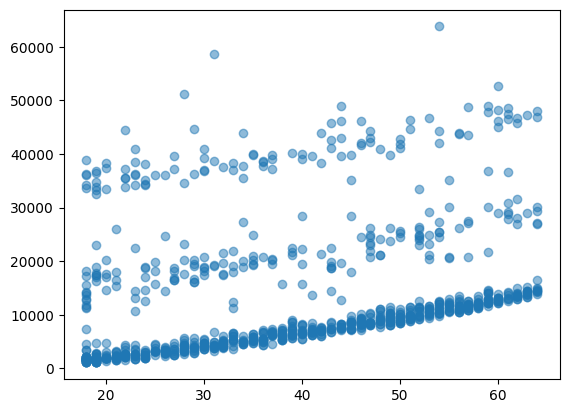

In [40]:
# Dibujamos diagrama de dispersión entre variables.
plt.scatter(X, Y, alpha=0.5)
plt.show()

Inflamos X para añadir la columna constante de unos.

In [41]:
X_c=np.hstack((np.ones((X.shape[0],1)),X))

In [42]:
X_c.shape

(937, 2)

In [43]:
n = X_c.shape[0]
m = X_c.shape[1]

## Decenso de gradiente

La tarea de su grupo es implementar el algoritmo de decenso de gradiente sobre este dataset. Comenzaremos por algunos pasos:

## Inicialización de $\theta$ aleatorio

In [44]:
theta = np.random.rand(m,1)

In [45]:
theta

array([[0.26175781],
       [0.94159617]])

In [46]:
theta.shape

(2, 1)

Midamos qué tan bueno es este theta aleatorio

$\hat{Y}= X  \theta$

In [47]:
Y_est=X_c.dot(theta)

$\hat{Y}-Y$

In [48]:
Y_est - Y

array([[-10071.08243393],
       [ -8928.81174175],
       [-26192.06319243],
       [ -8561.18981476],
       [ -3151.5444419 ],
       [ -2384.69852272],
       [-48621.58496078],
       [ -1628.27761505],
       [-39950.20832641],
       [ -7689.83695326],
       [-41618.0268186 ],
       [-11020.18485694],
       [-28297.55526476],
       [-13686.60463942],
       [-11891.19996078],
       [ -4326.65081491],
       [-13863.06537228],
       [-36132.27301122],
       [ -7698.64501093],
       [ -7710.28919942],
       [ -7686.50280709],
       [-23064.80324505],
       [ -9367.4298186 ],
       [-40993.47100709],
       [ -4424.00981491],
       [ -1609.13036505],
       [-15339.06922272],
       [-12043.37004927],
       [ -9520.5909301 ],
       [-48459.86402612],
       [-12543.3097416 ],
       [ -8079.3845301 ],
       [ -4849.70678025],
       [ -4878.8416034 ],
       [-14115.82726122],
       [ -7475.28299175],
       [-12054.21204927],
       [ -1607.28166505],
       [-133

In [ ]:
#MSE - función de costo, debería reducirse en cada iteración.
np.sum( np.power(Y_est-Y,2))

Según lo visto en clase, realice las iteraciones necesarias para ir actualizando $\theta$ para minimizar la función de costo.

* Una vez llegue a la convergencia del algoritmo, mida el performance del modelo sobre el conjunto de validación y prueba. No olvide también "inflar" los conjuntos de datos para incluir la columna constante.

* Debe implementar la función `fit_model` que reciba un conjunto de datos X y unas etiquetas Y y retorne el vector `theta` ajustado.

* Su código debería funcionar con conjuntos de datos de un X de tamaño arbitrario, incluya más variables en X y mida su error.

* Documente su código y realice conclusiones frente al ejercicio.

